In [49]:

import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline

def plot_pmf(dist, x):
    plt.scatter(x, dist.pmf(x))
    plt.vlines(x, 0, dist.pmf(x))
    plt.ylim(ymin=0)
    plt.xlabel('x')
    plt.ylabel('P(x)')

def plot_pdf(dist, x):
    plt.plot(x, dist.pdf(x))
    plt.ylim(ymin=0)
    plt.xlabel('x')
    plt.ylabel('pdf')

In [50]:
#A typist makes on average 2 mistakes per page.
# What is the probability of a particular page having no errors on it?

#poisson distribution because there is an interval as page


0.135335283237


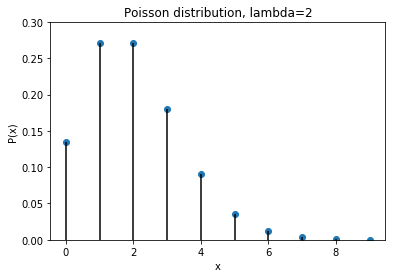

In [51]:

lam = 2
# what we call lambda here, scipy calls mu
pois = scs.distributions.poisson(mu=lam)
x = np.arange(0, 10, 1)
plot_pmf(pois, x)
plt.title('Poisson distribution, lambda={}'.format(lam));

print(pois.pmf(0))

In [52]:
# Components are packed in boxes of 20. 
# The probability of a component being defective is 0.1.
# What is the probability of a box containing 2 defective components?

0.285179807064


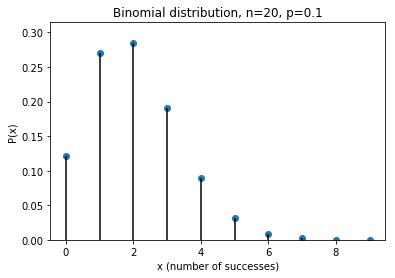

In [53]:
n, p = (20, 0.1)
binom = scs.distributions.binom(n=n,p=p)
x = np.arange(0, 10, 1)
plot_pmf(binom, x)
plt.title('Binomial distribution, n={}, p={}'.format(n,p))
plt.xlabel('x (number of successes)')

print(binom.pmf(2))

In [54]:
# Patrons arrive at a local bar at a mean rate of 30 per hour.
# What is the probability that the bouncer has to wait 
# more than 3 minutes to card the next patron?

#exponential distribution

0.223130160148


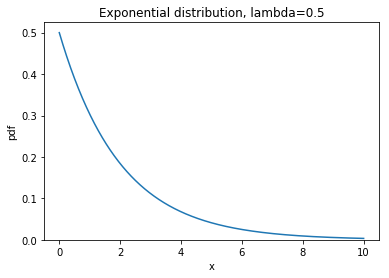

In [55]:
lam_e = 0.5
# lambda here gets inverted and passed to scipy as 'scale'
expo = scs.distributions.expon(scale=1./lam_e)
x = np.linspace(0, 10, 1000)
plot_pdf(expo, x)
plt.title('Exponential distribution, lambda={}'.format(lam_e));

print(1 - expo.cdf(3))

In [40]:
# A variable is normally distributed with a mean of 
# 120 and a standard deviation of 5. One score is randomly sampled.
# What is the probability the score is above 127? 
# Use scipy.stats.norm to perform the calculation.
#normal distribution - gausian

0.0807566592338


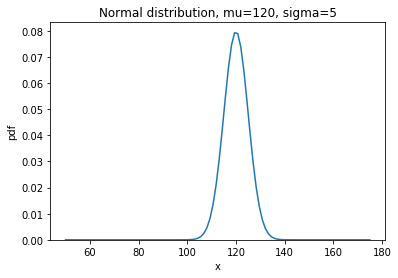

In [59]:
mu, sig = 120, 5
# scipy takes the means as 'loc' and the standard deviation as 'scale'
normal = scs.distributions.norm(loc=mu, scale=sig)
x = np.linspace(50, 175, 100)
plot_pdf(normal, x)
plt.title('Normal distribution, mu={}, sigma={}'.format(mu, sig));

print(1 - normal.cdf(127))

In [44]:
normal_2 = scs.norm(loc= mu, scale = sig)
1 - normal_2.cdf(127)

0.080756659233771066

In [45]:
# You need to find a tall person, at least 6 feet tall, to help you reach a cookie jar. 
# 8% of the population is 6 feet or taller.
# If you wait on the sidewalk, how many people would you 
# expect to have passed you by before you'd have a candidate to reach the jar?

#geometric dist

12.5


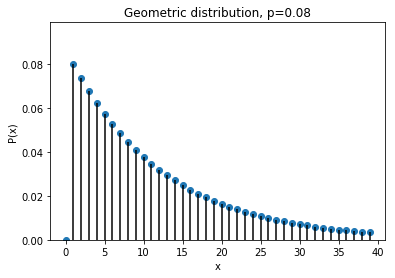

In [64]:
p = 0.08
geom = scs.distributions.geom(p=p)
x = np.arange(0, 40, 1)
plot_pmf(geom, x)
plt.title('Geometric distribution, p={}'.format(p));
expected_value = 1 / p
print(expected_value)

In [65]:
# A harried passenger will be several minutes late 
# for a scheduled 10 A.M. flight to NYC. Nevertheless, 
# he might still make the flight, since boarding is always allowed until 10:10 A.M.,
#     and boarding is sometimes permitted up to 10:30 AM.

# Assuming the extended boarding time is uniformly 
# distributed over the above limits, find the probability that 
# the passenger will make his flight, 
# assuming he arrives at the boarding gate at 10:25.

#uniform

0.238095238095


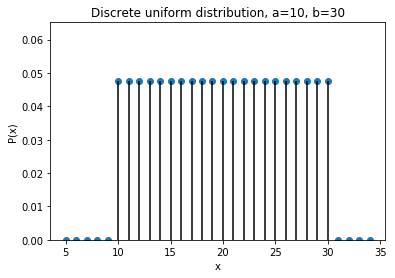

In [71]:
a, b = (10, 30)
unif_d = scs.randint(a,b+1)
x = np.arange(5, 35, 1)
plot_pmf(unif_d, x)
plt.title('Discrete uniform distribution, a={}, b={}'.format(a,b));

prob = 1 - unif_d.cdf(25)
print(prob)

In [72]:
# Suppose a university wants to look for factors that are correlated with
# the GPA of the students that they are going to admit.

In [75]:
# Load the data file data/admissions.csv into a pandas dataframe. 
# The columns are gpa, family_income and parent_avg_age.

import pandas as pd

In [76]:
df = pd.read_csv('data/admissions.csv')

In [78]:
df.head()

,family_income,gpa,parent_avg_age
0,31402.0,3.18,32
1,32247.0,2.98,48
2,34732.0,2.85,61
3,53759.0,3.39,62
4,50952.0,3.10,45


In [87]:
# Implement a covariance function and compute the covariance matrix of the dataframe. 
# Check your results with df.cov(). Make sure you 
# understand what each of the numbers in the matrix represents

#function to find covar
def df_covar(x,y):
    
    x_ar = np.array(x)
    y_ar = np.array(y)
    
    x_ex = np.mean(x_ar)
    y_ex = np.mean(y_ar)
    
#     x_dev = []
#     y_dev = []
    dev_products = []
    for i in range(len(x_ar)):
#         x_dev.append(x_ar[i] - x_ex)
#         y_dev.append(y_ar[i] - y_ex)
       dev_products.append((x_ar[i] - x_ex)*(y_ar[i] - y_ex))
    return np.sum(dev_products) / (len(dev_products)-1)
#     return np.mean(np.array(dev_products))

In [88]:
#call the func and pass it to the columns of dataframe

print(df_covar(df['family_income'],df['gpa']))

4015.29908503


In [89]:
print(df_covar(df['family_income'],df['parent_avg_age']))

-1226.32627973


In [90]:
print(df_covar(df['gpa'],df['parent_avg_age']))

-0.0287852599262


In [86]:
df.cov()

,family_income,gpa,parent_avg_age
family_income,3.329410e+08,4015.299085,-1226.326280
gpa,4.015299e+03,0.087891,-0.028785
parent_avg_age,-1.226326e+03,-0.028785,112.977442


In [91]:
def corr_from_covv(x,y):
    return df_covar(x,y) / (np.std(x,ddof = 1) * np.std(y,ddof = 1))

In [92]:
print(f"famm gpa {corr_from_covv(df['family_income'],df['gpa'])}")
print(f"famm parent age {corr_from_covv(df['family_income'],df['parent_avg_age'])}")
print(f"gpa parent age {corr_from_covv(df['gpa'],df['parent_avg_age'])}")

famm gpa 0.7422693902038502
famm parent age -0.006323048271903015
gpa parent age -0.009134853964512505


In [93]:
df.corr()

,family_income,gpa,parent_avg_age
family_income,1.000000,0.742269,-0.006323
gpa,0.742269,1.000000,-0.009135
parent_avg_age,-0.006323,-0.009135,1.000000


In [99]:
# def 
low_income = df[df['family_income'] <= 26832]['gpa']
medium_income = df[(df['family_income'] > 26832)  & (df['family_income'] < 37510)]['gpa']
high_income = df[df['family_income'] > 37510]['gpa']

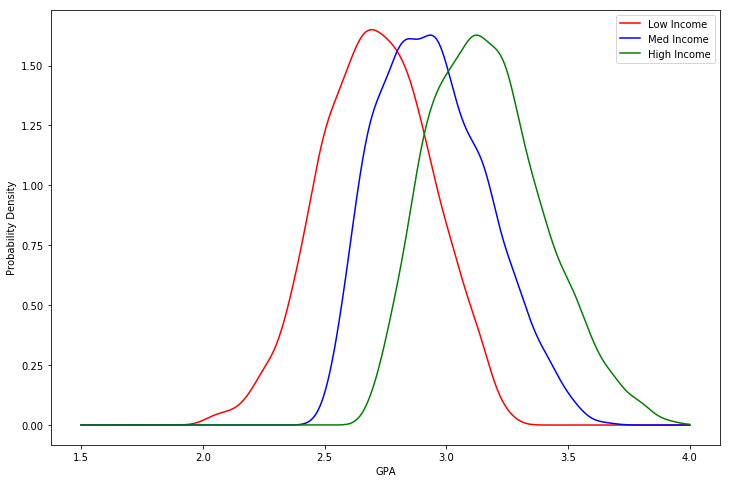

In [139]:
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm
from numpy import linspace,hstack
from pylab import plot,show,hist

#stack the variable
# samp = hstack([low_income,medium_income,high_income])
# obtaining the pdf (my_pdf is a function!)
min_pdf = gaussian_kde(low_income)
med_pdf = gaussian_kde(medium_income)
high_pdf = gaussian_kde(high_income)

# plotting the result
plt.figure(figsize = (12,8))
plt.xlabel('GPA')
plt.ylabel('Probability Density')
x = linspace(1.5,4,1000)
plot(x,min_pdf(x),'r',label = 'Low Income') # distribution function
plot(x,med_pdf(x),'b',label = 'Med Income')
plot(x,high_pdf(x),'g',label = 'High Income')
# hist(samp,normed=1,alpha=.3) # histogram
# show()
plt.legend()

array([ 2.85,  2.29,  3.01, ...,  3.35,  3.25,  3.04])

In addition to the family_income and parent_avg_age, you are also given data about the number of hours the students studied. Load the new data in from data/admissions_with_study_hrs_and_sports.csv.

In [141]:
df_2 = pd.read_csv('data/admissions_with_study_hrs_and_sports.csv')

In [142]:
df_2.sample(10)

,family_income,gpa,family_income_cat,parent_avg_age,hrs_studied,sport_performance
125,101201.0,3.57,high,44,580.166936,0.327411
8961,25338.0,2.73,low,63,1.733353,0.071718
9573,47567.0,2.87,medium,38,7.778303,0.016333
2596,60016.0,3.04,high,50,11.099590,0.001781
9634,71971.0,3.26,high,45,71.971490,0.068748
6782,37027.0,2.71,medium,31,1.347593,0.082830
5326,16921.0,2.79,low,58,2.934706,0.043182
2546,17451.0,2.86,low,48,6.566158,0.018989
4605,54054.0,2.96,high,34,13.413387,0.001429
10065,24019.0,3.16,low,51,33.105761,0.026308


In [143]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 6 columns):
family_income        10992 non-null float64
gpa                  10992 non-null float64
family_income_cat    10992 non-null object
parent_avg_age       10992 non-null int64
hrs_studied          10992 non-null float64
sport_performance    10992 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 515.3+ KB


In [144]:
df_2.describe()

,family_income,gpa,parent_avg_age,hrs_studied,sport_performance
count,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000
mean,40191.636736,2.997802,47.812136,81.264294,0.087883
std,18246.672190,0.296464,10.629085,307.919090,0.121802
min,168.000000,2.010000,30.000000,0.031922,0.000005
25%,26832.750000,2.800000,39.000000,3.568446,0.009565
50%,37510.000000,2.990000,48.000000,12.116674,0.040005
75%,51112.250000,3.200000,57.000000,45.018388,0.117099
max,125508.000000,3.970000,66.000000,9261.094740,0.975753


Make a scatter plot of hrs_studied versus gpa, with hrs_studied on the x-axis. Make the points more transparent so you can see the density of the points. Use the following command get the slope and intercept of a straight line to fit the data : slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(gpa, hrs_studied). Plot the straight line on the scatter plot.

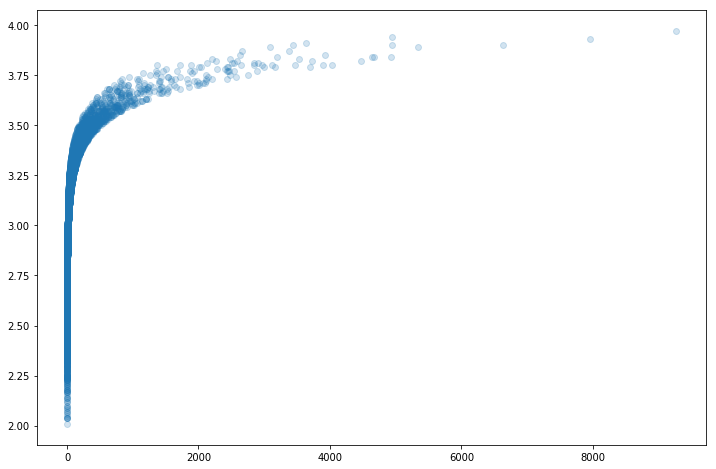

In [159]:
plt.figure(figsize= (12,8))
plt.scatter(x=df_2['hrs_studied'],y=df_2['gpa'], alpha = 0.2 )
slope, intercept, r_value, p_value, std_err = scs.linregress(df_2['gpa'], df_2['hrs_studied'])


Use the functions scipy.stats.pearsonr and scipy.stats.spearmanr to compute the Pearson and Spearman correlation coefficients between gpa and hrs_studied. What is the difference between the two coefficients? Can you explain why they are different?

In [160]:
print(scs.pearsonr(df_2['hrs_studied'],df_2['gpa']))

print(scs.spearmanr(df_2['hrs_studied'],df_2['gpa']))

(0.47594026466221012, 0.0)
SpearmanrResult(correlation=0.98495916559333363, pvalue=0.0)


In [ ]:
# https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/